In [1]:
from IPython.display import HTML
HTML("""
<video width=1024 controls>
  <source src="coo.mp4" type="video/mp4">
</video>
""")

In [2]:
# Import modules
import cv2
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

video_input_file_name = "coo.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy); plt.axis('off')    

def drawText(frame, txt, location, color = (50,170,50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)


In [3]:
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    print("Downloading GOTURN model zip file")
    urllib.request.urlretrieve('https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=1', 'GOTURN.zip')
    
    # Uncompress the file
    !tar -xvf GOTURN.zip

    # Delete the zip file
    os.remove('GOTURN.zip')

In [4]:
# Set up tracker
tracker_types = [ 'MIL', 'GOTURN']

# Change the index to change the tracker type
tracker_type = tracker_types[1]

if tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
else: 
    tracker = cv2.TrackerGOTURN_create()

In [5]:
# Read video
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()

# Exit if video not opened
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else : 
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
video_output_file_name = 'Football-' + tracker_type + '.mp4'
video_out = cv2.VideoWriter(video_output_file_name,cv2.VideoWriter_fourcc(*'avc1'), 10, (width, height))


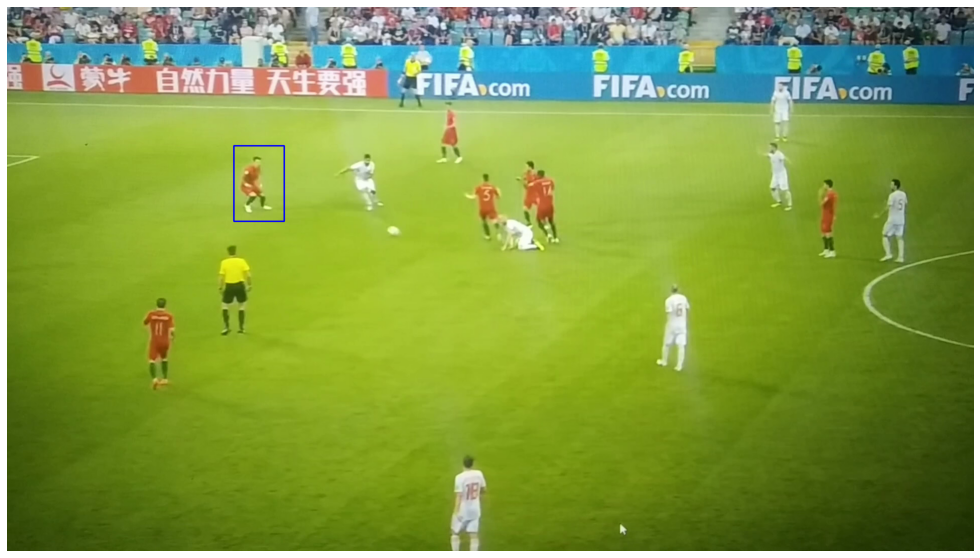

In [6]:
# Define a bounding box
bbox = (450,275, 100, 150)
 
#bbox = cv2.selectROI(frame, False)
#print(bbox)
displayRectangle(frame,bbox)

In [7]:
ok = tracker.init(frame, bbox)

In [8]:
while True:
    ok, frame = video.read()
    if not ok:
        break 
    
    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else :
        drawText(frame, "Tracking failure detected", (80,140), (0, 0, 255))

    # Display Info
    drawText(frame, tracker_type + " Tracker", (80,60))
    drawText(frame, "FPS : " + str(int(fps)), (80,100))
    
    # Write frame to video
    video_out.write(frame)
    
video.release()
video_out.release()

In [9]:
# Tracker: GOTURN
HTML("""
<video width=1024 controls>
  <source src="Football-GOTURN.mp4" type="video/mp4">
</video>
""") 

In [10]:
# Tracker: MIL
HTML("""
<video width=1024 controls>
  <source src="Football-MIL.mp4" type="video/mp4">
</video>
""") 